<a href="https://colab.research.google.com/github/Dinamo597/IA_2025/blob/main/Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga y exploración inicial de datos

### Subtask:
Cargar el dataset 'housing.csv' en un DataFrame de pandas y mostrar las primeras filas, información general y estadísticas descriptivas.


**Reasoning**:
The first step is to load the data and display basic information about the dataframe as requested in the instructions. This involves importing pandas, reading the csv file into a dataframe, displaying the head, info, and describe.



In [9]:
import pandas as pd
df = pd.read_csv('/content/housing.csv')
print("Primeras 5 filas del DataFrame:")
display(df.head())

print("\nInformación general del DataFrame:")
display(df.info())

print("\nEstadísticas descriptivas del DataFrame:")
display(df.describe())

Primeras 5 filas del DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None


Estadísticas descriptivas del DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
# Filtrar el DataFrame para mantener solo las filas donde total rooms > 0 && < 4
df_filtered_rooms = df[(df['total_rooms'] >= 0) & (df['total_rooms'] <= 4)].copy()

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado por 'total_rooms' (0-4):")
display(df_filtered_rooms.head())

Primeras filas del DataFrame filtrado por 'total_rooms' (0-4):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.375,137500.0,INLAND


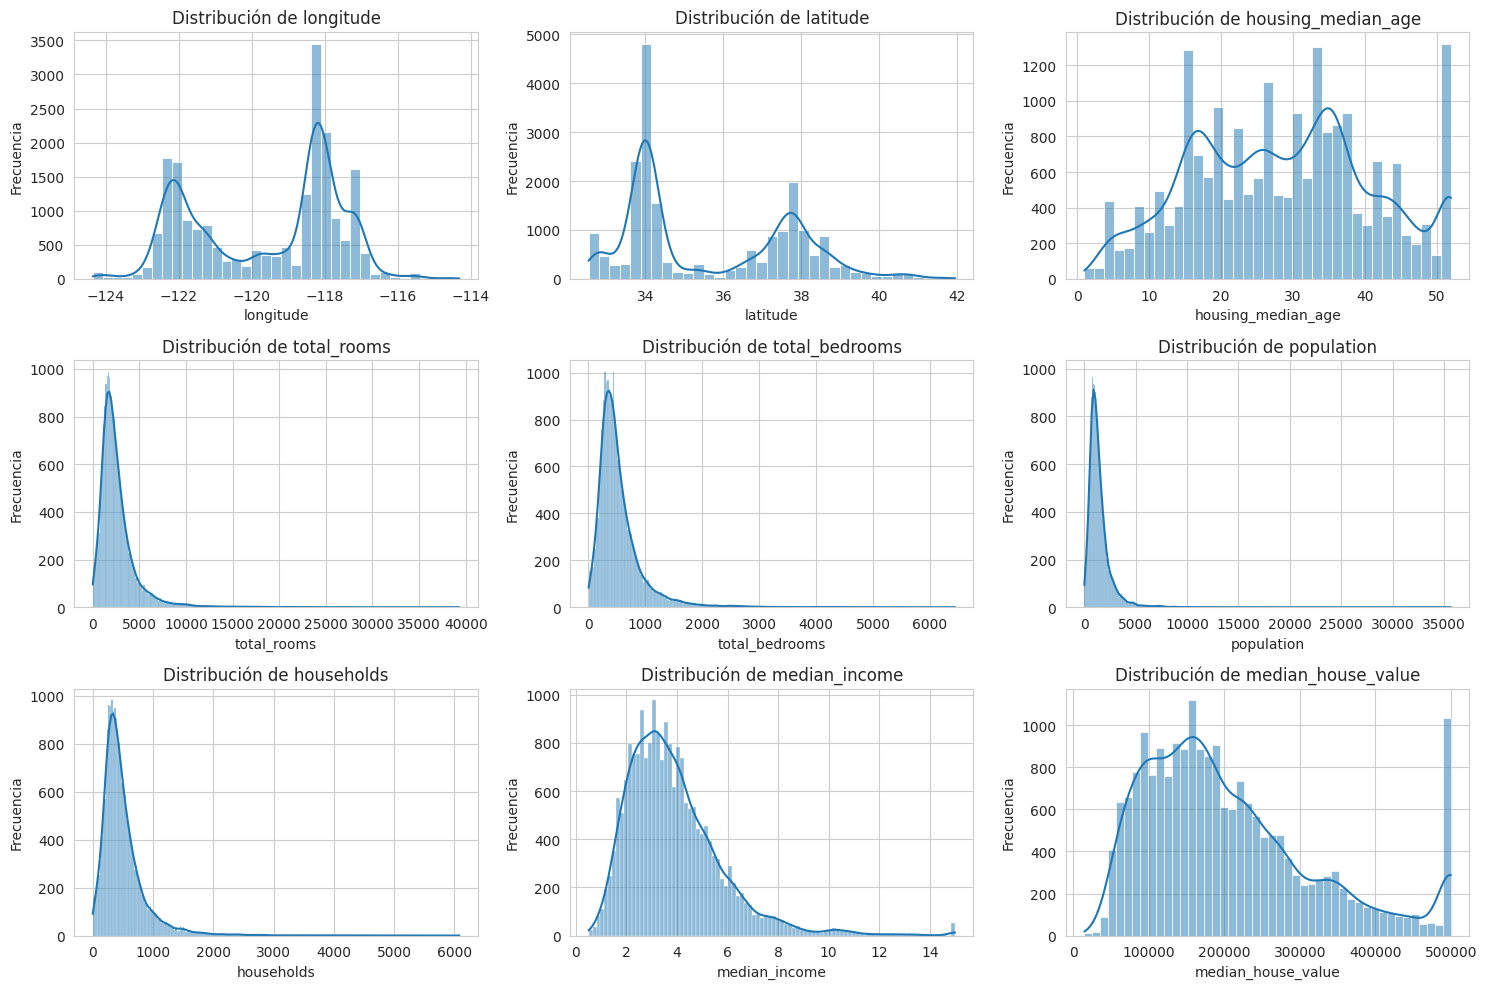

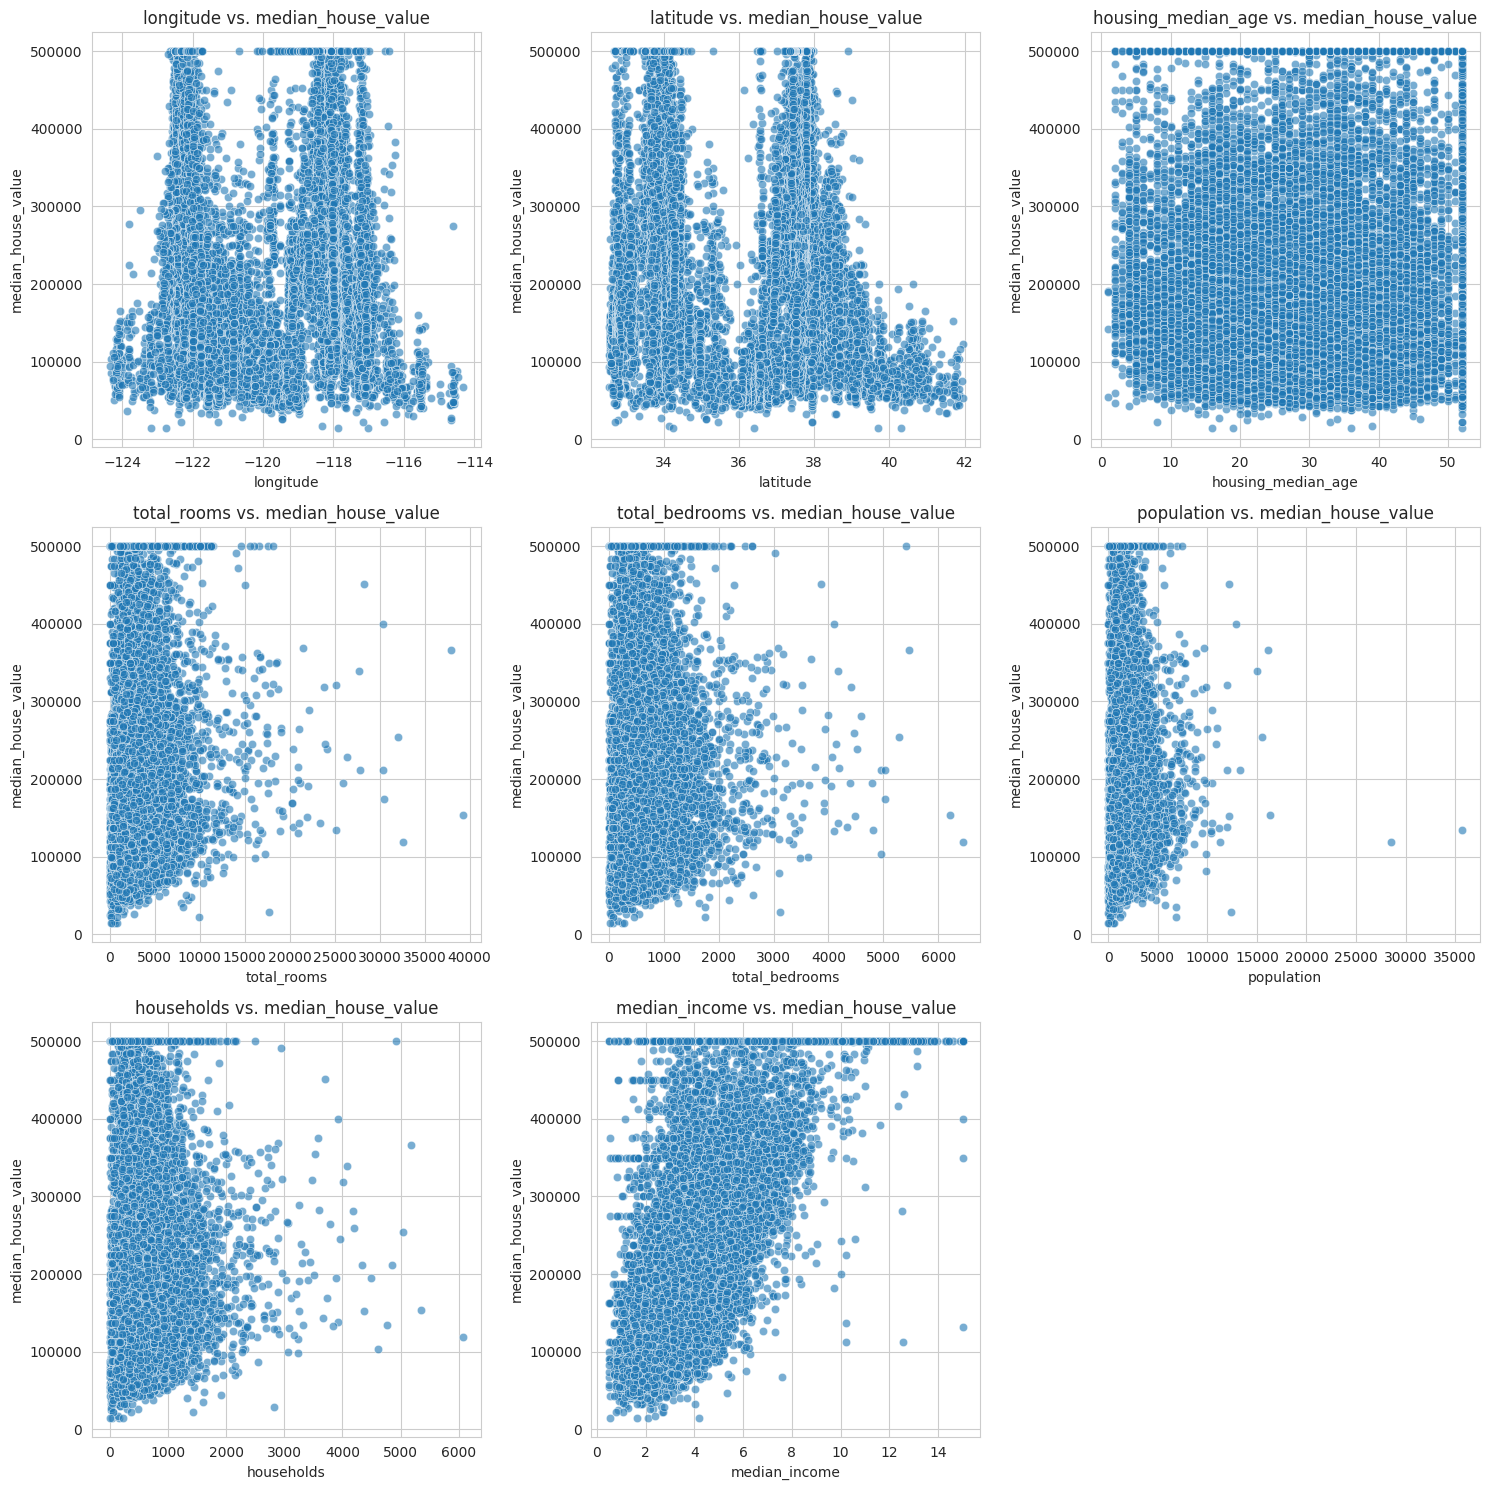

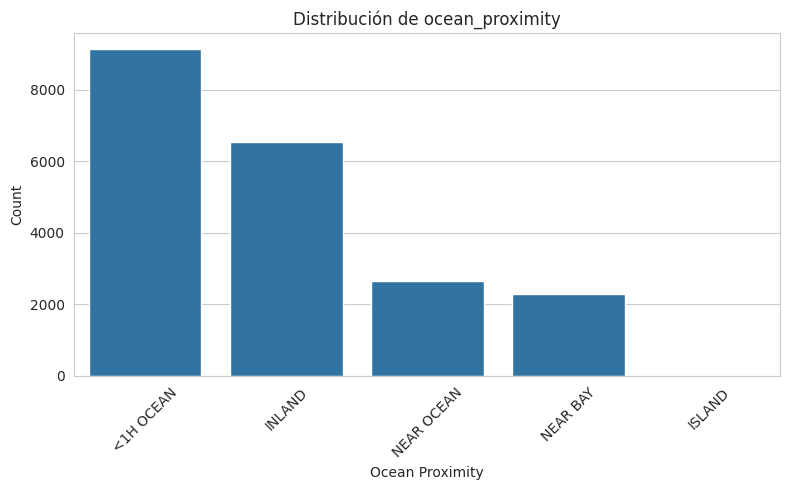

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# 1. Histograms for numerical variables
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 2. Scatter plots for numerical features vs. median_house_value
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features[:-1]): # Exclude 'median_house_value' from x-axis
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['median_house_value'], alpha=0.6)
    plt.title(f'{col} vs. median_house_value')
    plt.xlabel(col)
    plt.ylabel('median_house_value')
plt.tight_layout()
plt.show()

# 3. Bar plot for 'ocean_proximity'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ocean_proximity', order=df['ocean_proximity'].value_counts().index)
plt.title('Distribución de ocean_proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Separar la variable objetivo ('median_house_value') de las características
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Aplicar one-hot encoding a la columna 'ocean_proximity'
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=False)

# Mostrar las primeras filas del DataFrame X después de aplicar one-hot encoding
print("Primeras filas del DataFrame de características (X) después de One-Hot Encoding:")
display(X.head())

Primeras filas del DataFrame de características (X) después de One-Hot Encoding:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

for col in X.columns:
    #seleccionar columna y verificar correcta disposición
    X_i = X[[col]]
    model = LinearRegression()
    #pa entrenar al modelo
    model.fit(X_i, y)
    y_pred = model.predict(X_i)

    # Calcular el R2
    r2 = r2_score(y, y_pred)

    # Imprimir los resultados
    print(f"Característica: {col}")
    print(f"  Coeficiente: {model.coef_[0]}")
    print(f"  Intercepto: {model.intercept_}")
    print(f"  R-squared (R2): {r2}")
    print("-" * 30)

Característica: longitude
  Coeficiente: -2647.497815471664
  Intercepto: -109704.7144385498
  R-squared (R2): 0.0021129297054044427
------------------------------
Característica: latitude
  Coeficiente: -7788.312115186701
  Intercepto: 484367.875002836
  R-squared (R2): 0.02078218542857846
------------------------------
Característica: housing_median_age
  Coeficiente: 968.449639742756
  Intercepto: 179119.91658938478
  R-squared (R2): 0.011156305266710853
------------------------------
Característica: total_rooms
  Coeficiente: 7.095972205890665
  Intercepto: 188152.5153420206
  R-squared (R2): 0.017997057943996753
------------------------------
Característica: total_bedrooms
  Coeficiente: 13.608048560345578
  Intercepto: 199550.48767936922
  R-squared (R2): 0.002445981191058433
------------------------------
Característica: population
  Coeficiente: -2.5117527746150716
  Intercepto: 210436.2620762733
  R-squared (R2): 0.0006076066693256887
------------------------------
Característ

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Valores promedio
average_values = df.drop(['ocean_proximity', 'median_house_value'], axis=1).mean()

# Crear un diccionario con los valores para la casa de 4 habitaciones
# Inicializar con los valores promedio
house_4_rooms_data = average_values.to_dict()

house_4_rooms_data['total_rooms'] = 4.0
for col in X.columns:
    if 'ocean_proximity_' in col:
        house_4_rooms_data[col] = 0
#Crear Dataframe
house_4_rooms_df = pd.DataFrame([house_4_rooms_data], columns=X.columns)

house_data_avg_numeric = df.drop(['ocean_proximity', 'median_house_value'], axis=1).mean().to_frame().T

ocean_proximity_dummies_cols = [col for col in X.columns if 'ocean_proximity_' in col]
ocean_proximity_dummies_zeros = pd.DataFrame(0, index=[0], columns=ocean_proximity_dummies_cols)

house_4_rooms_input = pd.concat([house_data_avg_numeric, ocean_proximity_dummies_zeros], axis=1)

# Establecer el valor de 'total_rooms' a 4.0 en el DataFrame de entrada preparado
house_4_rooms_input['total_rooms'] = 4.0

# Asegurarse de que el orden de las columnas sea el mismo que en X
house_4_rooms_input = house_4_rooms_input[X.columns]


multivariable_model = LinearRegression()
multivariable_model.fit(X, y)

# Usar este modelo multivariable para predecir el valor de la vivienda para la casa de 4 habitaciones preparada.
predicted_value = multivariable_model.predict(house_4_rooms_input)

# 5. Imprimir el valor predicho de la vivienda para la casa de 4 habitaciones.
print("\nValor predicho de la vivienda para una casa con 4 habitaciones (con otras características promedio):")
print(f"${predicted_value[0]:,.2f}")


Valor predicho de la vivienda para una casa con 4 habitaciones (con otras características promedio):
$255,158.91
